In [15]:
#import dependencies
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [16]:
act_df=pd.read_csv("../raw_data/ACT/ACT scores/AVE_ACT_Scores_dis")
act_df = act_df.rename(columns={"District CD": "scode"})
act_df.head()

,Unnamed: 0,scode,District Name,Average State Composite,Average District Composite,State Bracket Composite,Average State Mathmatics,Average District Mathamatics,State Bracket Mathamatics,Average State Science,Average District Science,State Bracket Science,Average State Reading,Average District Reading,State Bracket Reading,Average State Writing Subscore,Average District Writing Subscore,State Bracket Writing Subscore
0,0,601,Appling County,21.0,20.8,Average,20.4,20.4,Average,21.0,20.1,Average,21.7,22.0,Average,6.9,NaN,0
1,1,602,Atkinson County,21.0,NaN,0,20.4,NaN,0,21.0,NaN,0,21.7,NaN,0,6.9,NaN,0
2,2,603,Bacon County,21.0,16.6,Below Average,20.4,16.5,Below Average,21.0,16.7,Below Average,21.7,17.1,Below Average,6.9,NaN,0
3,3,604,Baker County,21.0,NaN,0,20.4,NaN,0,21.0,NaN,0,21.7,NaN,0,NaN,NaN,NaN
4,4,605,Baldwin County,21.0,17.9,Below Average,20.4,17.3,Below Average,21.0,18.2,Below Average,21.7,18.5,Below Average,6.9,6.5,Average


In [17]:
sat_df=pd.read_csv("../raw_data/SAT_Scores_2018/cleaner_data_SAT.csv")
sat_df = sat_df.rename(columns={"School Dist Code": "scode"})
sat_df.head()
sat_df.to_csv("sat_clean.csv")

In [18]:
revexp_df=pd.read_csv("rev_exp_1718.csv")
revexp_df = revexp_df.rename(columns={"State Agency ID [District] 2017-18": "scode"})
revexp_df.head()

,scode,Agency Name,State Name [District] Latest available year,Total Number of Public Schools [Public School] 2017-18,Total Number Operational Charter Schools [Public School] 2017-18,Total Number Operational Schools [Public School] 2017-18,County Name [District] 2017-18,County Number [District] 2017-18,Agency ID - NCES Assigned [District] Latest available year,Lowest Grade Offered [District] 2017-18,...,Payments to State Governments (L12) [District Finance] 2017-18,Payments to Local Governments (M12) [District Finance] 2017-18,Land & Existing Structures - Capital Outlay (G15) [District Finance] 2017-18,Non-specified - Equipment Expenditures (K11) [District Finance] 2017-18,Instructional Equipment - Capital Outlay (K09) [District Finance] 2017-18,Construction - Capital Outlay (F12) [District Finance] 2017-18,Other Equipment - Capital Outlay (K10) [District Finance] 2017-18,Other Expenditures - Non El-Sec (V80) [District Finance] 2017-18,Adult Education - Non El-Sec (V75) [District Finance] 2017-18,Community Services - Non El-Sec (V70) [District Finance] 2017-18
0,601,APPLING COUNTY,Georgia,6.0,0,6,Appling County,13001,1300060,Prekindergarten,...,0,0,0,0,0,949000,374000,0,0,0
1,602,ATKINSON COUNTY,Georgia,4.0,0,4,Atkinson County,13003,1300090,Prekindergarten,...,0,0,22000,0,0,237000,211000,0,0,0
2,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,0,0,2024000,0,330000,27670000,8453000,0,1021000,0
3,603,BACON COUNTY,Georgia,4.0,0,4,Bacon County,13005,1300150,Prekindergarten,...,0,0,32000,0,0,0,260000,0,0,0
4,604,BAKER COUNTY,Georgia,2.0,0,2,Baker County,13007,1300180,Prekindergarten,...,0,0,0,0,0,403000,96000,0,0,0


In [19]:
re_satdf=pd.merge(revexp_df,sat_df,on="scode")
re_satdf= re_satdf.rename(columns={"School Dist Name": "School Dist Name_SAT","Test Component":"Test Component_SAT","State Avg Score":"State Avg Score_SAT","Dist Avg Score":"Dist Avg Score_SAT","Test Score Bracket":"Test Score Bracket_SAT"})
re_satdf.head()

,scode,Agency Name,State Name [District] Latest available year,Total Number of Public Schools [Public School] 2017-18,Total Number Operational Charter Schools [Public School] 2017-18,Total Number Operational Schools [Public School] 2017-18,County Name [District] 2017-18,County Number [District] 2017-18,Agency ID - NCES Assigned [District] Latest available year,Lowest Grade Offered [District] 2017-18,...,Construction - Capital Outlay (F12) [District Finance] 2017-18,Other Equipment - Capital Outlay (K10) [District Finance] 2017-18,Other Expenditures - Non El-Sec (V80) [District Finance] 2017-18,Adult Education - Non El-Sec (V75) [District Finance] 2017-18,Community Services - Non El-Sec (V70) [District Finance] 2017-18,School Dist Name_SAT,Test Component_SAT,State Avg Score_SAT,Dist Avg Score_SAT,Test Score Bracket_SAT
0,601,APPLING COUNTY,Georgia,6.0,0,6,Appling County,13001,1300060,Prekindergarten,...,949000,374000,0,0,0,Appling County,Combined Test Score,1052,1020.0,Average
1,602,ATKINSON COUNTY,Georgia,4.0,0,4,Atkinson County,13003,1300090,Prekindergarten,...,237000,211000,0,0,0,Atkinson County,Combined Test Score,1052,994.0,Average
2,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,27670000,8453000,0,1021000,0,Atlanta Public Schools,Combined Test Score,1052,948.0,Below Average
3,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,27670000,8453000,0,1021000,0,Atlanta Public Schools,Combined Test Score,1052,948.0,Below Average
4,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,27670000,8453000,0,1021000,0,Atlanta Public Schools,Combined Test Score,1052,948.0,Below Average


In [20]:
re_satdf=pd.merge(re_satdf,act_df,on="scode",suffixes=(" ","_ACT"))
re_satdf.head()

,scode,Agency Name,State Name [District] Latest available year,Total Number of Public Schools [Public School] 2017-18,Total Number Operational Charter Schools [Public School] 2017-18,Total Number Operational Schools [Public School] 2017-18,County Name [District] 2017-18,County Number [District] 2017-18,Agency ID - NCES Assigned [District] Latest available year,Lowest Grade Offered [District] 2017-18,...,State Bracket Mathamatics,Average State Science,Average District Science,State Bracket Science,Average State Reading,Average District Reading,State Bracket Reading,Average State Writing Subscore,Average District Writing Subscore,State Bracket Writing Subscore
0,601,APPLING COUNTY,Georgia,6.0,0,6,Appling County,13001,1300060,Prekindergarten,...,Average,21.0,20.1,Average,21.7,22.0,Average,6.9,NaN,0
1,602,ATKINSON COUNTY,Georgia,4.0,0,4,Atkinson County,13003,1300090,Prekindergarten,...,0,21.0,NaN,0,21.7,NaN,0,6.9,NaN,0
2,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,Average,21.0,18.7,Below Average,21.7,19.4,Below Average,6.9,6.3,Average
3,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,Average,21.0,18.7,Below Average,21.7,19.4,Below Average,6.9,6.3,Average
4,761,ATLANTA PUBLIC SCHOOLS,Georgia,89.0,17,89,Fulton County,13121,1300120,Prekindergarten,...,Average,21.0,18.7,Below Average,21.7,19.4,Below Average,6.9,6.3,Average


In [21]:
re_satdf.to_csv("revexpactsat1718.csv")

In [22]:
re_satdf.drop_duplicates(keep='first', inplace=True)
schoolcode=pd.read_csv("schooltype_1718.csv")
re_satdf=pd.merge(re_satdf,schoolcode,on="scode")
scode=re_satdf["scode"]
re_satdf = re_satdf.loc[(scode<1000)]
re_satdf.dropna()
re_satdf.head()
re_satdf.to_csv("revexpactsat1718.csv")
#print(list(re_satdf))

In [23]:
dis_id=re_satdf["scode"].to_list()
agency_name=re_satdf["Agency Name"].to_list()
tot_op_schools=re_satdf["Total Number Operational Schools [Public School] 2017-18"].to_list()
county_name=re_satdf["County Name [District] 2017-18"].to_list()
high_grade=re_satdf["Highest Grade Offered [District] 2017-18"].to_list()
fall_students=re_satdf['Fall Membership (V33) [District Finance] 2017-18'].to_list()
state_food_rev=re_satdf['State Rev. - School Lunch Programs (C10) [District Finance] 2017-18'].to_list()
food_exp=re_satdf['Food Services - Non Instuctional (E11) [District Finance] 2017-18'].to_list()
textbook_exp=re_satdf['Textbooks for Instruction (V93) [District Finance] 2017-18'].to_list()
state_transport_rev=re_satdf['State Rev. - Transportation Programs (C12) [District Finance] 2017-18'].to_list()
dist_name_sat=re_satdf['School Dist Name_SAT'].to_list()
test_comp_sat=re_satdf['Test Component_SAT'].to_list()
state_avg_sat=re_satdf['State Avg Score_SAT'].to_list()
dist_avg_sat=re_satdf['Dist Avg Score_SAT'].to_list()
test_bin_sat=re_satdf['Test Score Bracket_SAT'].to_list()
dist_name_act=re_satdf['District Name'].to_list()
state_avg_comp_act=re_satdf['Average State Composite'].to_list()
dist_avg_copm_act=re_satdf['Average District Composite'].to_list()
state_bin_comp_act=re_satdf['State Bracket Composite'].to_list()
state_avg_math_act=re_satdf['Average State Mathmatics'].to_list()
dist_avg_math_act=re_satdf['Average District Mathamatics'].to_list()
state_bin_math_act=re_satdf['State Bracket Mathamatics'].to_list()
state_avg_sci_act=re_satdf['Average State Science'].to_list()
dist_avg_sci_act=re_satdf['Average District Science'].to_list()
state_bin_sci_act=re_satdf['State Bracket Science'].to_list()
state_avg_read_act=re_satdf['Average State Reading'].to_list()
dist_avg_read_act=re_satdf['Average District Reading'].to_list()
state_bin_read_act=re_satdf['State Bracket Reading'].to_list()
state_avg_write_act=re_satdf['Average State Writing Subscore'].to_list()
dist_avg_write_act=re_satdf['Average District Writing Subscore'].to_list()
state_bin_write_act=re_satdf['State Bracket Writing Subscore'].to_list()

new_dict={
    "school code":dis_id,
    "agency name":agency_name,
    "total operational schools":tot_op_schools,
    "county name":county_name,
    "highest grade taught":high_grade,
    "fall population":fall_students,
    "state revenue - lunch":state_food_rev,
    "expenditure - food":food_exp,
    "expenditure - textbooks":textbook_exp,
    "state revenue - transport":state_transport_rev,
    "sat - district name":dist_name_sat,
    "sat - test component":test_comp_sat,
    "sat - state average":state_avg_sat,
    "sat - district average":dist_avg_sat,
    "sat - score bracket":test_bin_sat,
    "act - district name":dist_name_act,
    "act - state average":state_avg_comp_act,
    "act - district average":dist_avg_copm_act,
    "act - score bracket":state_bin_comp_act
    
}

clean_df=pd.DataFrame(new_dict)
clean_df.head()

,school code,agency name,total operational schools,county name,highest grade taught,fall population,state revenue - lunch,expenditure - food,expenditure - textbooks,state revenue - transport,sat - district name,sat - test component,sat - state average,sat - district average,sat - score bracket,act - district name,act - state average,act - district average,act - score bracket
0,601,APPLING COUNTY,6,Appling County,12th Grade,3639.0,50000,2398000,38000,667000,Appling County,Combined Test Score,1052,1020.0,Average,Appling County,21.0,20.8,Average
1,602,ATKINSON COUNTY,4,Atkinson County,12th Grade,1699.0,31000,1215000,157000,254000,Atkinson County,Combined Test Score,1052,994.0,Average,Atkinson County,21.0,NaN,0
2,761,ATLANTA PUBLIC SCHOOLS,89,Fulton County,12th Grade,52147.0,639000,28545000,6700000,3095000,Atlanta Public Schools,Combined Test Score,1052,948.0,Below Average,Atlanta Public Schools,21.0,18.8,Below Average
3,603,BACON COUNTY,4,Bacon County,12th Grade,2140.0,33000,1450000,7000,302000,Bacon County,Combined Test Score,1052,972.0,Below Average,Bacon County,21.0,16.6,Below Average
4,604,BAKER COUNTY,2,Baker County,12th Grade,286.0,6000,208000,38000,113000,Baker County,Combined Test Score,1052,900.0,Below Average,Baker County,21.0,NaN,0


In [24]:
#drop district with missing values for state revenue for lunch
dirty_df = clean_df.loc[clean_df["state revenue - lunch"] == "miss", :]
toplot_df=clean_df.drop([145])
toplot_df= toplot_df.dropna(how="any")
toplot_df.to_csv("datatoplot.csv")

toplot_df["state revenue - lunch"] = pd.to_numeric(toplot_df["state revenue - lunch"])
toplot_df["expenditure - food"] = pd.to_numeric(toplot_df["expenditure - food"])
toplot_df["expenditure - textbooks"] = pd.to_numeric(toplot_df["expenditure - textbooks"])
toplot_df["state revenue - transport"] = pd.to_numeric(toplot_df["state revenue - transport"])
toplot_df.dtypes
toplot_df["state revenue - lunch"].max()
toplot_df.head()

,school code,agency name,total operational schools,county name,highest grade taught,fall population,state revenue - lunch,expenditure - food,expenditure - textbooks,state revenue - transport,sat - district name,sat - test component,sat - state average,sat - district average,sat - score bracket,act - district name,act - state average,act - district average,act - score bracket
0,601,APPLING COUNTY,6,Appling County,12th Grade,3639.0,50000,2398000,38000,667000,Appling County,Combined Test Score,1052,1020.0,Average,Appling County,21.0,20.8,Average
2,761,ATLANTA PUBLIC SCHOOLS,89,Fulton County,12th Grade,52147.0,639000,28545000,6700000,3095000,Atlanta Public Schools,Combined Test Score,1052,948.0,Below Average,Atlanta Public Schools,21.0,18.8,Below Average
3,603,BACON COUNTY,4,Bacon County,12th Grade,2140.0,33000,1450000,7000,302000,Bacon County,Combined Test Score,1052,972.0,Below Average,Bacon County,21.0,16.6,Below Average
5,605,BALDWIN COUNTY,6,Baldwin County,12th Grade,5219.0,104000,4392000,300000,819000,Baldwin County,Combined Test Score,1052,944.0,Below Average,Baldwin County,21.0,17.9,Below Average
6,606,BANKS COUNTY,4,Banks County,12th Grade,2792.0,40000,1661000,71000,438000,Banks County,Combined Test Score,1052,1021.0,Average,Banks County,21.0,20.1,Average


The r-value is 0.18.


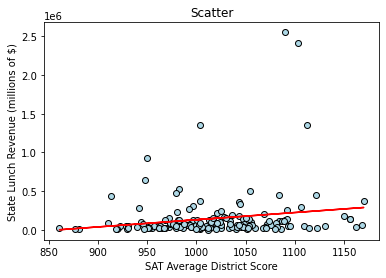

In [25]:
plt.title("Scatter")
plt.xlabel("SAT Average District Score")
plt.ylabel("State Lunch Revenue (millions of $)")

x_values = toplot_df["sat - district average"]
y_values = toplot_df["state revenue - lunch"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is {round(correlation[0],2)}.")
plt.scatter(x_values,y_values,c="lightblue",edgecolor="black")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color=“red”)

plt.savefig("images/stlunchrev_distavgSAT_scatter.png")
plt.show()

The r-value is 0.16.


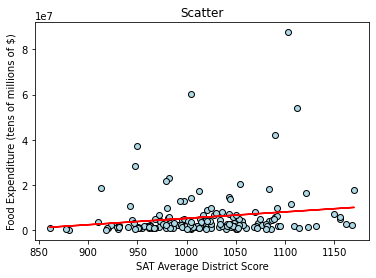

In [26]:
plt.title("Scatter")
plt.xlabel("SAT Average District Score")
plt.ylabel("Food Expenditure (tens of millions of $)")

x_values = toplot_df["sat - district average"]
y_values = toplot_df["expenditure - food"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is {round(correlation[0],2)}.")
plt.scatter(x_values,y_values,c="lightblue",edgecolor="black")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color=“red”)

plt.savefig("images/foodexp_distavgSAT_scatter.png")
plt.show()

The r-value is 0.27.


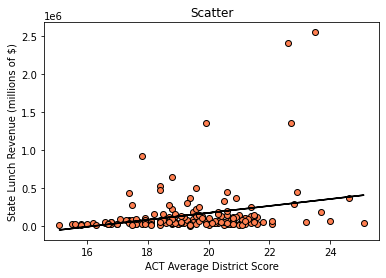

In [27]:
plt.title("Scatter")
plt.xlabel("ACT Average District Score")
plt.ylabel("State Lunch Revenue (millions of $)")

x_values = toplot_df["act - district average"]
y_values = toplot_df["state revenue - lunch"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is {round(correlation[0],2)}.")
plt.scatter(x_values,y_values,c="coral",edgecolor="black")
plt.plot(x_values,regress_values,"k-")
#plt.annotate(line_eq,(6,10),fontsize=15,color=“red”)

plt.savefig("images/stlunchrev_distavgACT_scatter.png")
plt.show()

The r-value is 0.24.


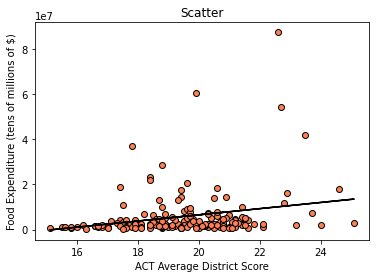

In [28]:
plt.title("Scatter")
plt.xlabel("ACT Average District Score")
plt.ylabel("Food Expenditure (tens of millions of $)")

x_values = toplot_df["act - district average"]
y_values = toplot_df["expenditure - food"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)
print(f"The r-value is {round(correlation[0],2)}.")
plt.scatter(x_values,y_values,c="coral",edgecolor="black")
plt.plot(x_values,regress_values,"k-")
#plt.annotate(line_eq,(6,10),fontsize=15,color=“red”)

plt.savefig("images/foodexp_distavgACT_scatter.png")
plt.show()